# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('df_model.csv', parse_dates=['Adjusted_Date'])
df['Adjusted_Date'] = pd.to_datetime(df['Adjusted_Date'])
df = df.set_index('Adjusted_Date')

# Exploratory Data Analysis

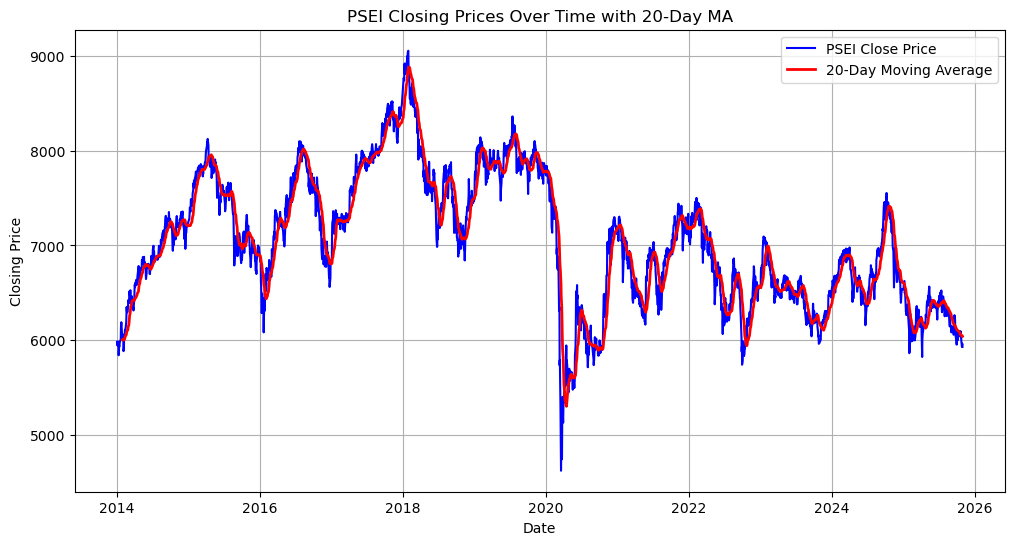

In [3]:
# Plot PSEI closing prices over time
# Compute moving average (20-day)
df['PSEI_MA20'] = df['PSEI_Close'].rolling(window=20).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['PSEI_Close'], label='PSEI Close Price', color='blue')
plt.plot(df.index, df['PSEI_MA20'], label='20-Day Moving Average', color='red', linewidth=2)
plt.title('PSEI Closing Prices Over Time with 20-Day MA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

df.drop(columns=['PSEI_MA20'], inplace=True)

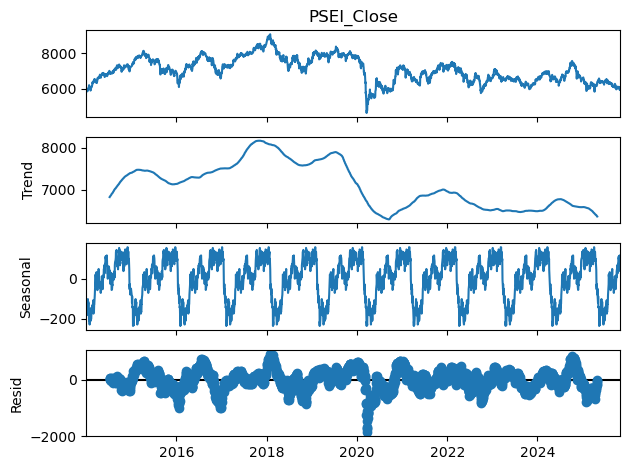

In [4]:
# Decompose time series to observe trend, seasonality, and residuals
result = seasonal_decompose(df['PSEI_Close'], model='additive', period=252)
result.plot()
plt.tight_layout()
plt.show()

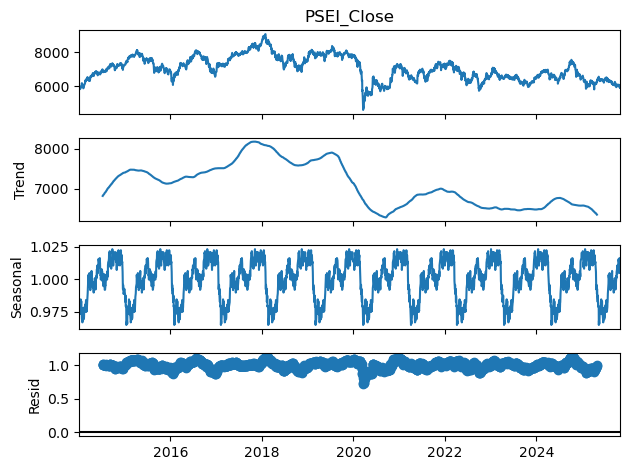

In [5]:
# Decompose time series to observe trend, seasonality, and residuals
result2 = seasonal_decompose(df['PSEI_Close'], model='multiplicative', period=252)
result2.plot()
plt.tight_layout()
plt.show()

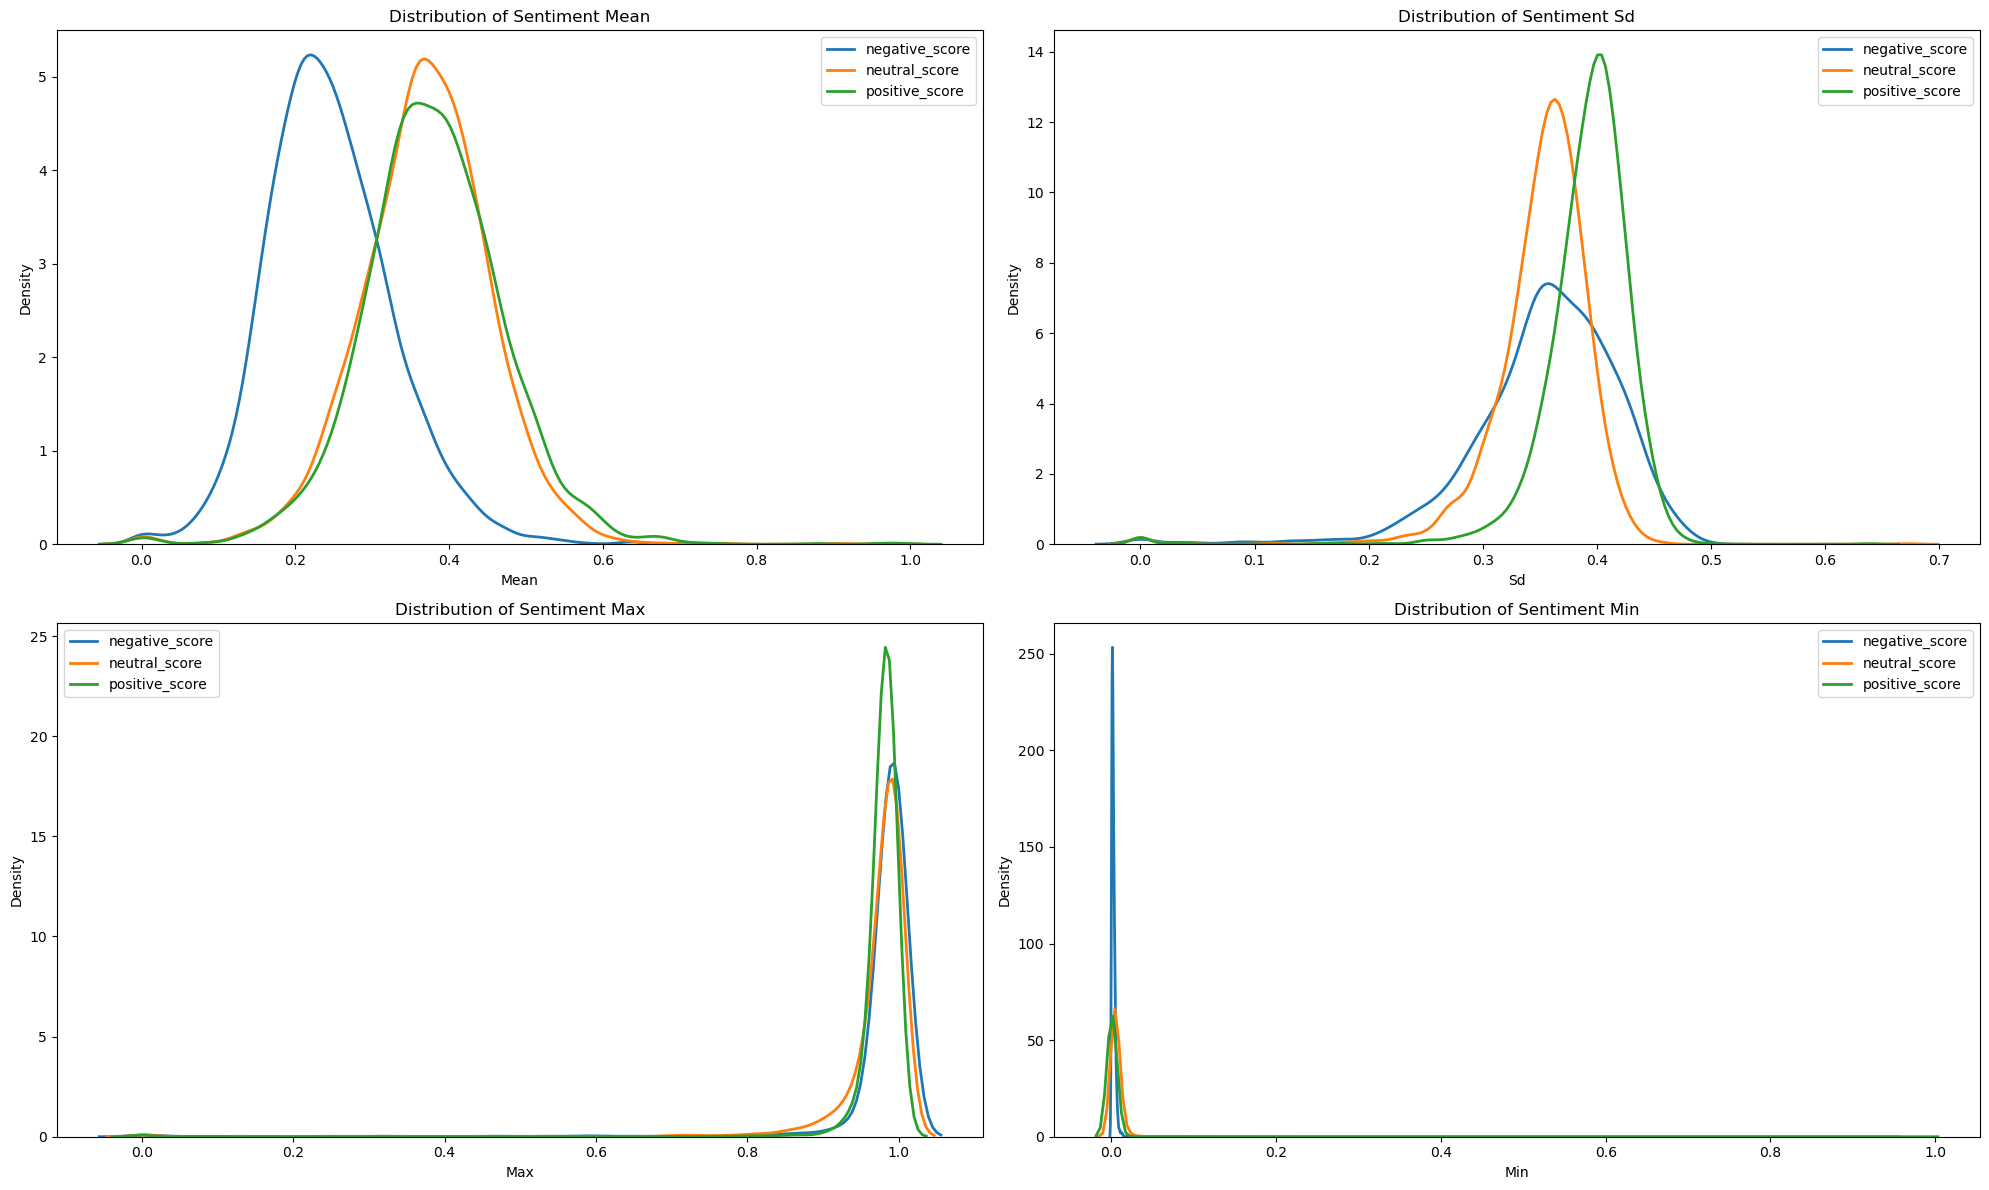

In [6]:
# Plot distribution of sentiment scores
# Sentiment metrics
metrics = ['mean', 'sd', 'max', 'min']
sentiment_cols = ['negative_score', 'neutral_score', 'positive_score']

plt.figure(figsize=(20, 12))

# Loop through metrics and sentiment columns
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    for col in sentiment_cols:
        col_name = f"{col}_{metric}"  # e.g., 'negative_score_mean'
        sns.kdeplot(df[col_name], label=col, linewidth=2)
    
    plt.title(f"Distribution of Sentiment {metric.capitalize()}")
    plt.xlabel(metric.capitalize())
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_8340/2123009523.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=sentiment_cols, patch_artist=True)
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_8340/2123009523.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=sentiment_cols, patch_artist=True)
/var/folders/tz/gs_7p8rj7tz_vx4snsdf_c2m0000gp/T/ipykernel_8340/2123009523.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=sentiment_cols, patch_artist=True)
/var/folders/tz/gs_

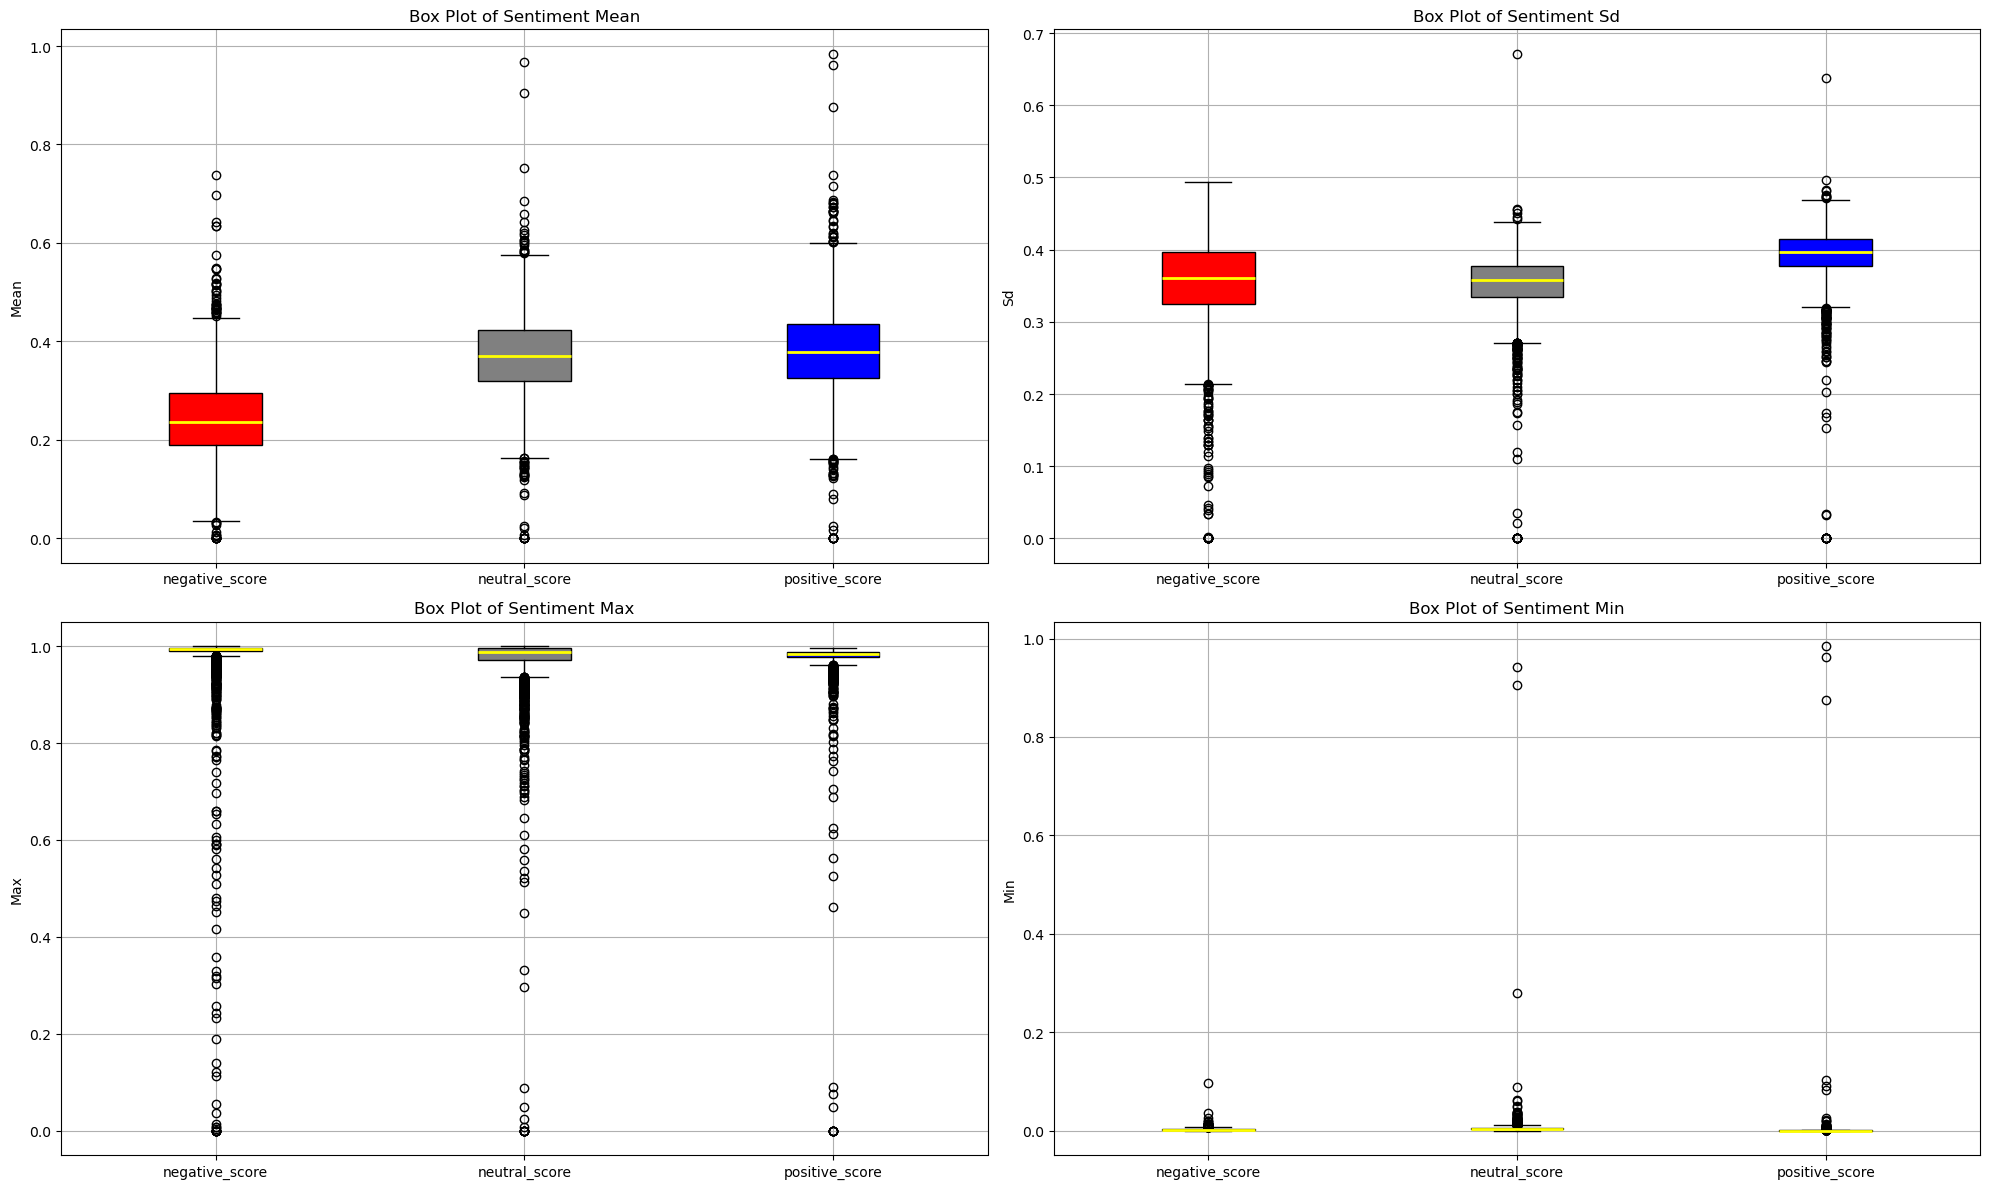

In [7]:
# Define colors for each sentiment
colors = ['red', 'gray', 'blue']  # negative, neutral, positive

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    data_to_plot = [df[f"{col}_{metric}"] for col in sentiment_cols]
    
    # Create boxplot
    box = plt.boxplot(data_to_plot, labels=sentiment_cols, patch_artist=True)
    
    # Set colors for each box
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Optionally adjust whiskers, medians, caps
    for whisker in box['whiskers']:
        whisker.set(color='black', linewidth=1)
    for cap in box['caps']:
        cap.set(color='black', linewidth=1)
    for median in box['medians']:
        median.set(color='yellow', linewidth=2)
    
    plt.title(f"Box Plot of Sentiment {metric.capitalize()}")
    plt.ylabel(metric.capitalize())
    plt.grid(True)

plt.tight_layout()
plt.show()

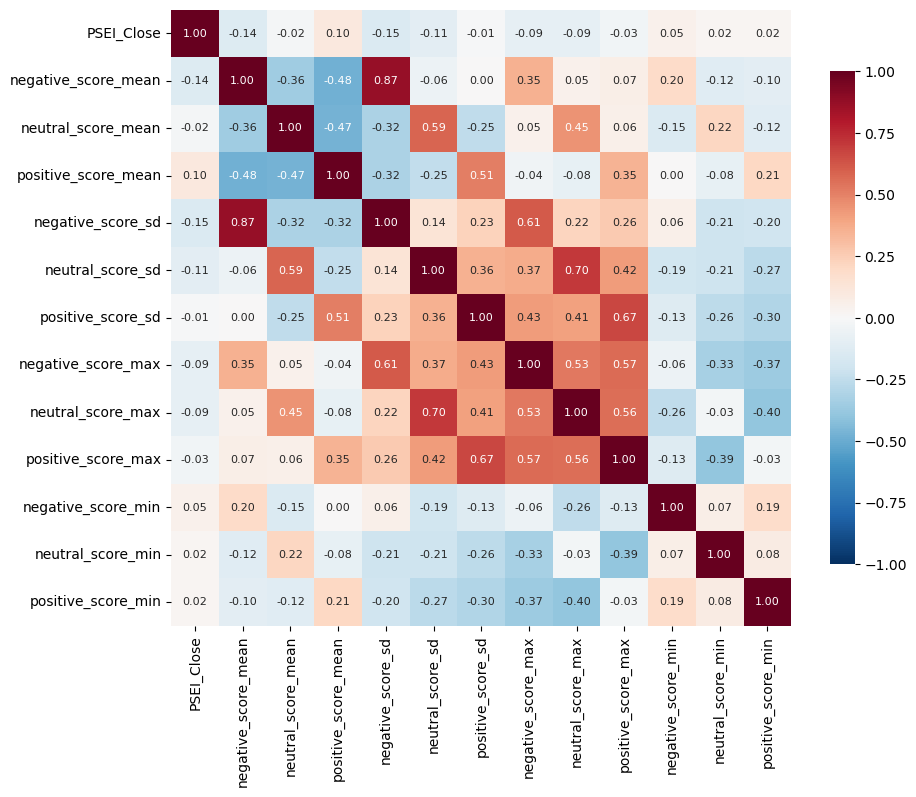

In [8]:
# Correlation matrix of all variables
corr = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    cmap='RdBu_r',
    vmin = -1,
    vmax = 1,
    center = 0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8}
)
plt.show()

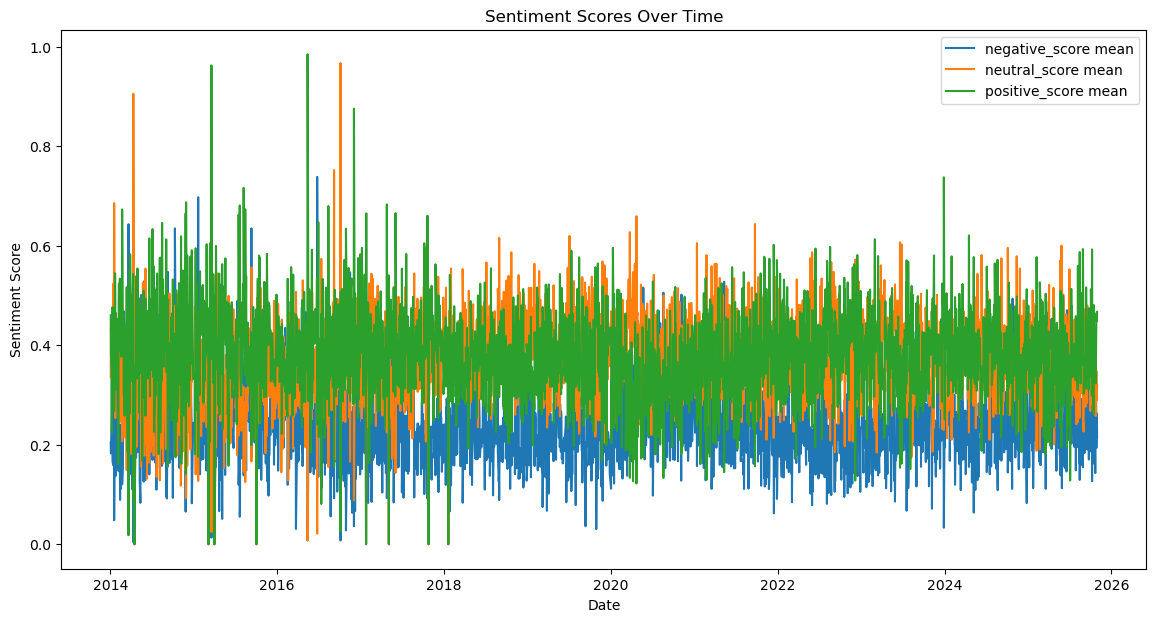

In [9]:
# Create line plot of sentiment scores over time
plt.figure(figsize=(14, 7))
for col in sentiment_cols:
    plt.plot(df.index, df[f"{col}_mean"], label=f"{col} mean")
plt.title("Sentiment Scores Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()